# Analítica de datos
# Examen parcial 1
# 2018-02
## Yesid Leonardo López Sierra, A00056408

El dataset que deben analizar contiene los registros del histórico de las personas a las que se les ha otorgado un crédito financiero, indicando quienes pudieron pagarlo sin problemas y quienes no.

La idea es poder predecir, utilizando un modelo de aprendizaje supervisado (KNN) y las variables independientes disponibles qué aspirantes a un crédito tienen mas o menos riesgo de pagar.

Las variables de la hoja de datos son las siguientes:
- ID: El ID del cliente en el banco. Numérico, debe ser positivo y único.
- PudoPagar: Indica si el cliente ha podido pagar el crédito sin problemas (1) o no (0). Variable categórica binaria.
- Estudiante: Indica si el cliente es estudiante (Si) o no lo es (No). Variable categórica binaria.
- Deuda: Indica la cantidad del crédito que aún adeuda el cliente. Deben ser valores numéricos positivos o nulos.
- Cuenta: Indica el dinero que tiene en la cuenta del banco. Deben ser valores numéricos.

## Entendimiento de los datos, limpieza

El archivo "creditos_examen.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

#### Puntos a desarrollar

- Carguen el archivo en memoria y exploren los datos, tratando de identificar problemas e inconsistencias teniendo en cuenta el diccionario de datos y el contexto del problema. (0.7)

- Obtengan el modelo de referencia (Baseline) y calculen sus métricas de evaluación. (0.3)

- Limpien los datos arreglando los problemas, eliminando columnas, eliminando registros, o ignorándolos, justificando sus decisiones. 
Una vez resueltos los problemas encontrados, indique la siguiente información: ID del registro, Tipo de ProblemaResolución. (1.2)

## Modelamiento con K-NN

#### Puntos a desarrollar:

- Escogiendo un valor de los parámetros al azar, construyan un modelo K-NN inicial sobre los datos limpios y calcule las métricas de accuracy, error, kappa, precision, recall, especifidad, y F-measure. Analice la calidad del modelo interpretando las métricas (1.0).

- Teniendo en cuenta las métricas más adecuadas para el problema, y siguiendo un protocolo de evaluación adecuado, establezca el mejor valor de los parámetros del modelo. (1.5)

- ¿El valor de los parámetros inicialmente escogido estaba en una situación de overfitting o de underfitting? Explique su respuesta. (0.5)

# Desarrollo de los puntos

A continuación, cargamos el dataset. Para esto usamos cargamos las librerías

In [314]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score, cross_validate #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

## Exploración de los datos

Primero cargamos el dataset: 

In [315]:
dataset=pd.read_csv("./creditos_examen.csv",sep=";")
dataset=pd.DataFrame(dataset)

Vemos un poco sobre el tipo de datos del data set e imprimimos los primeros diez valores:

In [316]:
print(dataset.info())
print("\nTipos de datos de las columnas: \n", dataset.dtypes)
print("\nDiez primeros registros: \n",dataset.head(10))
print("\nColumnas: ",dataset.columns)
print("\nTamaño: ",dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
ID            10000 non-null int64
PudoPagar     10000 non-null int64
Estudiante    9996 non-null object
Ingresos      10000 non-null int64
Cuenta        10000 non-null int64
dtypes: int64(4), object(1)
memory usage: 390.7+ KB
None

Tipos de datos de las columnas: 
 ID             int64
PudoPagar      int64
Estudiante    object
Ingresos       int64
Cuenta         int64
dtype: object

Diez primeros registros: 
    ID  PudoPagar Estudiante  Ingresos   Cuenta
0  -1          0         No   3196574   358943
1  -1          0         No   4944040  3857756
2   1          0         No   4436163  3647632
3   2          0         Si   1210613  4085902
4   3          0         No   3176714  5367746
5   4          0         No   3570449  2646253
6   5          0         No   3846350  3928279
7   6          0         Si    749156  4597943
8   7          0         No   2490523  4127567
9   8    

In [317]:
dataset.describe(include="all")

,ID,PudoPagar,Estudiante,Ingresos,Cuenta
count,10000.000000,10000.000000,9996,1.000000e+04,1.000000e+04
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,No,NaN,NaN
freq,NaN,NaN,7052,NaN,NaN
mean,5000.423000,0.033300,NaN,3.036625e+06,1.433952e+07
std,2887.023398,0.179428,NaN,7.028938e+07,1.016575e+09
min,-1.000000,0.000000,NaN,-4.288864e+09,-2.247063e+07
25%,2500.750000,0.000000,NaN,1.823537e+06,2.408656e+06
50%,5000.500000,0.000000,NaN,3.209805e+06,4.118185e+06
75%,7500.250000,0.000000,NaN,4.281578e+06,5.831542e+06


Vemos cuántos valores son menores o iguales a cero en la columna de cuenta, y cuántos son menores a cero en ingresos:

In [318]:
print("Deudas menores o iguales a cero:",dataset[dataset["Ingresos"]<0].shape[0]/dataset.shape[0])

Deudas menores o iguales a cero: 0.0999


A continuación, separaremos las variables independientes de la dependiente solo para probar con el modelo de regerencia baseline:

De lo anterior podemos identificar que la variable dependiente en este caso es "PudoPagar" pues el objetivo es identificar qué aspirantes a un crédito tienen mas o menos riesgo de pagar. Por otro lado podemos observar que todos los datos son enteros exceptuando el si es estudiante o no.  
Por lo tanto no es tenida en cuenta. Por lo tanto, las variables dependientes serán Estudiante, Ingresos y Cuenta.

In [319]:
target=dataset['PudoPagar']
features=dataset[["ID","Estudiante", "Ingresos","Cuenta"]]

print("variables independientes: \n", features.columns, features.shape)
print("\nvariable dependiente: \n", target.head(), target.shape)



variables independientes: 
 Index(['ID', 'Estudiante', 'Ingresos', 'Cuenta'], dtype='object') (10000, 4)

variable dependiente: 
 0    0
1    0
2    0
3    0
4    0
Name: PudoPagar, dtype: int64 (10000,)


Tomando como base el **modelo de referencia Baseline**, es teniendo en cuenta la clase mayoritaria. 

In [320]:
from scipy import stats
mayoritario=stats.mode(target)
moda=mayoritario.mode[0]
print("Clase que más se repite: ",moda)

predicted=np.repeat(moda, target.size)

print("Exactitud: ", metrics.accuracy_score(predicted, target))
print("\nReporte métricas: \n",metrics.classification_report(predicted, target))

Clase que más se repite:  0
Exactitud:  0.9667

Reporte métricas: 
              precision    recall  f1-score   support

          0       1.00      0.97      0.98     10000
          1       0.00      0.00      0.00         0

avg / total       1.00      0.97      0.98     10000



/home/yeye/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Limpieza de datos

Eliminamos los registros donde tenemos valores nulos. En el caso de la columna de estudiante, tenemos datos que son nulos, por lo tanto los debemos de eliminar.

In [321]:
dataset=dataset.dropna()
print(dataset.shape)

#dataset=dataset[["ID","Estudiante", "Ingresos","Cuenta"]]


(9996, 5)


Eliminamos la columna de ID debido a que es una variable que no influye si una persona deserta o no.

In [322]:
dataset=dataset.drop(labels="ID",axis=1)

Como se observó anteriormente en la exploración de los datos, el 10% de los registros tenían un valor numérico negativo, por lo tanto, tomamos el valor absoluto de estas columnas.

In [323]:
dataset["Ingresos"]=dataset["Ingresos"].abs()
print("Deudas menores a cero:",dataset[dataset["Ingresos"]<0].size/dataset.shape[0])

Deudas menores a cero: 0.0


Al terminar la limpieza tendremos que las variables independientes son: cuenta,deuda y estudiante.

In [324]:
print("variables independientes: \n", features.columns)
print("\nvariable dependiente paga o no paga: \n", target.values)


variables independientes: 
 Index(['ID', 'Estudiante', 'Ingresos', 'Cuenta'], dtype='object')

variable dependiente paga o no paga: 
 [0 0 0 ... 0 0 0]


Una vez ya hemos limpiado los datos, veremos el resultado de la limpieza:

In [325]:
dataset.columns=["PudoPagar","Estudiante","Deuda","Cuenta"]
dataset.head(10)

,PudoPagar,Estudiante,Deuda,Cuenta
0,0,No,3196574,358943
1,0,No,4944040,3857756
2,0,No,4436163,3647632
3,0,Si,1210613,4085902
4,0,No,3176714,5367746
5,0,No,3570449,2646253
6,0,No,3846350,3928279
7,0,Si,749156,4597943
8,0,No,2490523,4127567
9,0,Si,1760045,4043338


In [326]:
# dim_x=0
# dim_y=1

# features=dataset[["Deuda","Cuenta"]]
# target=dataset.PudoPagar

# featuresArray=np.array(features)
# targetArray=np.array(target)

# print(dataset.shape,featuresArray.shape,targetArray.shape)
# grupo= dataset.groupby('PudoPagar')
# print(grupo.get_group(0).shape)
# print(grupo.get_group(1).shape)


# target_names=["Pagó","No pagó"]
# for name, group in dataset.groupby('PudoPagar'):
#     print(group["Deuda"],group)
# #     print(featuresArray[group.index,dim_x], featuresArray[group.index,dim_y])
# #     plt.scatter(group["Deuda"], featuresArray[group.index,dim_y])
# plt.legend()

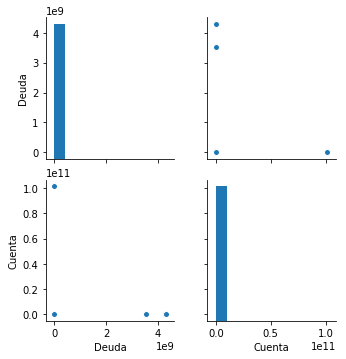

In [327]:
sns.pairplot(dataset[dataset.columns[1:4]])

Ahora, debido a que tenemos dos tipos de valores para un estudiante (Lo es(Si) o no(No)), dividiremos el dataset en dos. El dataset para estudiantes y el de no estudiantes.  
El desarrollador a simple vista puede pensar que es mejor dejarlo como una feature más, sin embargo, el hecho de que sea solo dos valores hace que el sesgo incrementa.

In [328]:
datasetEstudiantes=dataset[dataset["Estudiante"]=="Si"]

datasetNoEstudiantes=dataset[dataset["Estudiante"]=="No"]

# MODELO KNN - Estudiantes

Ahora procederemos a crear y entrenar un modelo KNN con k=5 para el caso de los estudiantes.

 de accuracy, error, kappa, precision, recall, especifidad, y F-measure. Analice la calidad del modelo interpretando las métricas (1.0).m

In [329]:

features=datasetEstudiantes[["Deuda","Cuenta"]]
target=datasetEstudiantes.PudoPagar

cf=neighbors.KNeighborsClassifier(n_neighbors=5)
cf.fit(features, target)

predicted=cf.predict(features)

### Metricas del modelo

([<matplotlib.axis.YTick at 0x7f16f3ea1828>,
 <a list of 2 Text yticklabel objects>)

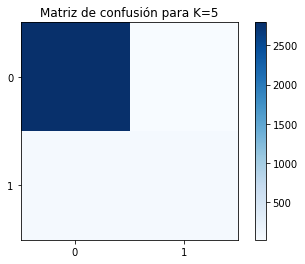

In [330]:
cm=metrics.confusion_matrix(target,predicted)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0,1])
plt.yticks(tick_marks, [0,1])

In [331]:

print("Exactitud: ", metrics.accuracy_score(target,predicted))
print("Error: ",1-metrics.accuracy_score(target,predicted))
print("Kappa    : ", metrics.cohen_kappa_score(target,predicted))
print("-------------------------------------")
print("Metricas para la categoría clientes estudiantes con problemas en el pago" )
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[0], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[0], average="macro"))
VN = np.sum(cm[1,1])
FP = np.sum(cm[1,0])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[0], average="macro"))
print("-------------------------------------")
print("Metricas para la categoría clientes estudiantes sin problemas en el pago" )
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[1], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[1], average="macro"))
VN = np.sum(cm[0,0])
FP = np.sum(cm[0,1])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[1], average="macro"))
cm

Exactitud:  0.9690896739130435
Error:  0.03091032608695654
Kappa    :  0.5533801896480441
-------------------------------------
Metricas para la categoría clientes estudiantes con problemas en el pago
Precisión     :  0.9765734265734266
Recall        :  0.9914802981895634
Especificidad :  0.47244094488188976
F1-score      :  0.9839704069050556
-------------------------------------
Metricas para la categoría clientes estudiantes sin problemas en el pago
Precisión     :  0.7142857142857143
Recall        :  0.47244094488188976
Especificidad :  0.9914802981895634
F1-score      :  0.5687203791469194


array([[2793,   24],
       [  67,   60]])

A continuación, interpretaremos cada métrica:  
* Tenemos una exactitud del 97%, lo que significa que tiene un error del 3% donde no predice de forma correcta. 
* Tenemos un kappa del 55%. Esto significa que el porcentaje de instancias clasificadas por el clasificador de aprendizaje automático que coinciden con los datos etiquetados como verdad fundamental es de 55%
* Para el caso de la categoría de clientes estudiantes con problemas en el pago, tenemos:
    * El porcentaje de personas que realmente tuvieron problemas en el pago, respecto a los que fueron predecidos fue del 97.66%
    * El porcentaje de personas que fue predecido que tendrían problemas con el pago, respecto a los que verdaderamente lo tuvieron fue del 99.15%
    * El porcentaje de personas predecidas que no tuvieron problema con el pago, respecto a los que verdaderamente no lo tuvieron es del 47.24%
    * El promedio armónico entre el recall y la precisión es de 98.40%
* Para el caso de la categoría de clientes estudiantes sin problemas en el pago, tenemos:
    * El porcentaje de personas que realmente no tuvieron problemas en el pago, respecto a los que fueron predecidos fue del 71.43%
    * El porcentaje de personas que fue predecido que no tendrían problemas con el pago, respecto a los que verdaderamente no lo tuvieron fue del 47.24%
    * El porcentaje de personas predecidas que tuvieron problema con el pago, respecto a los que verdaderamente lo tuvieron es del 98.15%
    * El promedio armónico entre el recall y la precisión es de 56.87%
    
Lo anterior significa que en términos de predecir los estudiantes que tuvieron problemas con el pago es bueno, sin embargo, a la hora de predecir aquellos estudiantes que no tuvieron problemas no es muy bueno.

# MODELO KNN - No Estudiantes

Ahora procederemos a crear y entrenar un modelo KNN con k=5 para el caso de los estudiantes.

In [332]:

features=datasetNoEstudiantes[["Deuda","Cuenta"]]
target=datasetNoEstudiantes.PudoPagar

cf=neighbors.KNeighborsClassifier(n_neighbors=5)
cf.fit(features, target)

predicted=cf.predict(features)

### Metricas del modelo

([<matplotlib.axis.YTick at 0x7f16f3ea92b0>,
 <a list of 2 Text yticklabel objects>)

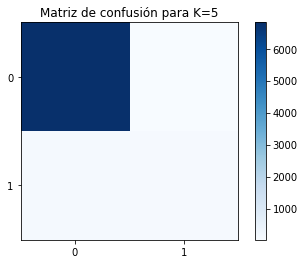

In [333]:
cm=metrics.confusion_matrix(target,predicted)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0,1])
plt.yticks(tick_marks, [0,1])

In [334]:

print("Exactitud: ", metrics.accuracy_score(target,predicted))
print("Error: ",1-metrics.accuracy_score(target,predicted))
print("Kappa    : ", metrics.cohen_kappa_score(target,predicted))
print("-------------------------------------")
print("Metricas para la categoría clientes no estudiantes con problemas en el pago" )
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[0], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[0], average="macro"))
VN = np.sum(cm[1,1])
FP = np.sum(cm[1,0])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[0], average="macro"))
print("-------------------------------------")
print("Metricas para la categoría clientes no estudiantes sin problemas en el pago" )
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[1], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[1], average="macro"))
VN = np.sum(cm[0,0])
FP = np.sum(cm[0,1])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[1], average="macro"))
cm

Exactitud:  0.9784458309699376
Error:  0.021554169030062353
Kappa    :  0.49359950716016154
-------------------------------------
Metricas para la categoría clientes no estudiantes con problemas en el pago
Precisión     :  0.9814441887226697
Recall        :  0.9966403739409875
Especificidad :  0.3737864077669903
F1-score      :  0.9889839107116973
-------------------------------------
Metricas para la categoría clientes no estudiantes sin problemas en el pago
Precisión     :  0.77
Recall        :  0.3737864077669903
Especificidad :  0.9966403739409875
F1-score      :  0.5032679738562091


array([[6823,   23],
       [ 129,   77]])

A continuación, interpretaremos cada métrica:  
* Tenemos una exactitud del 97.84%, lo que significa que tiene un error del 2.16% donde no predice de forma correcta. 
* Tenemos un kappa del 49.35%. Esto significa que el porcentaje de instancias clasificadas por el clasificador de aprendizaje automático que coinciden con los datos etiquetados como verdad fundamental es de 49.35%
* Para el caso de la categoría de clientes no estudiantes con problemas en el pago, tenemos:
    * El porcentaje de personas que realmente tuvieron problemas en el pago, respecto a los que fueron predecidos fue del 98.14%
    * El porcentaje de personas que fue predecido que tendrían problemas con el pago, respecto a los que verdaderamente lo tuvieron fue del 99.66%
    * El porcentaje de personas predecidas que no tuvieron problema con el pago, respecto a los que verdaderamente no lo tuvieron es del 37.38%
    * El promedio armónico entre el recall y la precisión es de 99.9%
* Para el caso de la categoría de clientes no estudiantes sin problemas en el pago, tenemos:
    * El porcentaje de personas que realmente no tuvieron problemas en el pago, respecto a los que fueron predecidos fue del 77%
    * El porcentaje de personas que fue predecido que no tendrían problemas con el pago, respecto a los que verdaderamente no lo tuvieron fue del 37.38%
    * El porcentaje de personas predecidas que tuvieron problema con el pago, respecto a los que verdaderamente lo tuvieron es del 99.66%
    * El promedio armónico entre el recall y la precisión es de 50.33%
    
Lo anterior significa que en términos de predecir los no estudiantes que tuvieron problemas con el pago es bueno, sin embargo, a la hora de predecir aquellos estudiantes que no tuvieron problemas no es muy bueno.

## KNN-Estudiantes usando protocolos

A continuación encontraremos el k más óptimo basado en diferentes métricas. Para esto usaremos dos protocolos: Holdout y K-fold cross validation

### Holdout

(2944, 2)


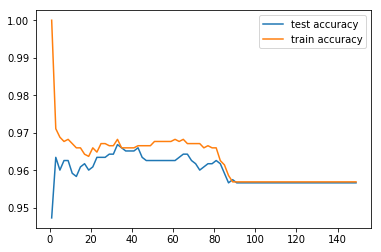

K_óptimo: 33
Exactitud para k=5. Training accuracy score: 0.9688561721404304 Test accuracy score: 0.9601018675721562


In [335]:
features=datasetEstudiantes[["Deuda","Cuenta"]]
target=datasetEstudiantes.PudoPagar
print(features.shape)

x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.4, random_state=123, stratify=target)

acc_score=[]
acc_training=[]
k_values=np.arange(1,150,2)
for k in k_values:
    cf=neighbors.KNeighborsClassifier(n_neighbors=k)
    cf.fit(x_train,y_train)
    y_predicted=cf.predict(x_test)
    acc_score.append(metrics.accuracy_score(y_predicted,y_test))
    y_predicted=cf.predict(x_train)
    acc_training.append(metrics.accuracy_score(y_predicted,y_train))
    
plt.plot(k_values, acc_score)
plt.plot(k_values, acc_training)
plt.legend(['test accuracy','train accuracy'])
plt.show()

maximo=max(acc_score)
indiceMaximo=0
for i in range(0,len(acc_score)):
    if(acc_score[i]==maximo):
        indiceMaximo=i
print("K_óptimo:", k_values[indiceMaximo])
print("Exactitud para k=5. Training accuracy score:", acc_training[2],"Test accuracy score:", acc_score[2])

Como se pudo observar, el k_óptimo para el caso de los estudiantes corresponde a 33. Sin embargo, usar este protocolo no es muy útil debido a qué está sujeto a la aleatoriedad.

### K-fold cross validation

In [336]:
means=[]
stds=[]
best_k=0
for i in k_values:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cf = neighbors.KNeighborsClassifier(n_neighbors=i)
    accuracies = cross_val_score(cf, features, target, scoring="accuracy", cv=100)
    current_mean=accuracies.mean()
    current_std=accuracies.std()
    means.append(current_mean)
    stds.append(current_std)

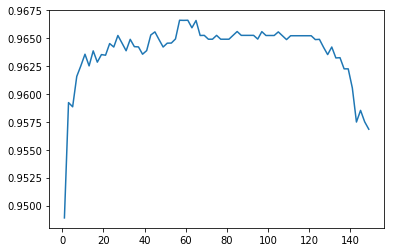

Best accuraccy: 0.9666236559139787
Best K: 61
Exactitud para k=5. Test accuracy score: 0.9588605858361143


In [337]:
plt.plot(k_values, means)
plt.show()

best_k=0
for i in range(0,len(means)):
    if(means[i]==max(means)):
        best_k=i
print("Best accuraccy:", max(means))
print("Best K:", k_values[best_k])
print("Exactitud para k=5. Test accuracy score:", means[2])

Como se puede observar en la imagen anterior, el k óptimo, para el caso de los estudiantes, está en 61. 

Es importante recalcar que esta medida es mucho más confiable que la anterior debido a que el protocolo holdout está muy sujeto a incertidumbre debido a su aleatoriedad. 

## KNN-No Estudiantes usando protocolos

### Holdout

(7052, 2)


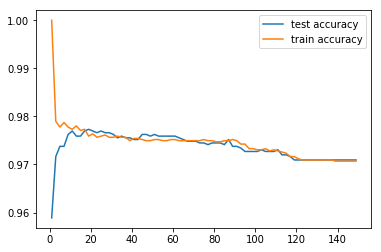

K_óptimo: 19
Exactitud para k=5. Training accuracy score: 0.9777830300165445 Test accuracy score: 0.9737681673165545


In [338]:
features=datasetNoEstudiantes[["Deuda","Cuenta"]]
target=datasetNoEstudiantes.PudoPagar
print(features.shape)

x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.4, random_state=123, stratify=target)

acc_score=[]
acc_training=[]
k_values=np.arange(1,150,2)
for k in k_values:
    cf=neighbors.KNeighborsClassifier(n_neighbors=k)
    cf.fit(x_train,y_train)
    y_predicted=cf.predict(x_test)
    acc_score.append(metrics.accuracy_score(y_predicted,y_test))
    y_predicted=cf.predict(x_train)
    acc_training.append(metrics.accuracy_score(y_predicted,y_train))
    
plt.plot(k_values, acc_score)
plt.plot(k_values, acc_training)
plt.legend(['test accuracy','train accuracy'])
plt.show()


maximo=max(acc_score)
indiceMaximo=0
for i in range(0,len(acc_score)):
    if(acc_score[i]==maximo):
        indiceMaximo=i
print("K_óptimo:", k_values[indiceMaximo])
print("Exactitud para k=5. Training accuracy score:", acc_training[2],"Test accuracy score:", acc_score[2])

Como se pudo observar, el k_óptimo para el caso de los no estudiantes corresponde a 19. Sin embargo, usar este protocolo no es muy útil debido a qué está sujeto a la aleatoriedad.

### K-fold cross validation

In [339]:
means=[]
stds=[]
best_k=0
for i in k_values:
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cf = neighbors.KNeighborsClassifier(n_neighbors=i)
    accuracies = cross_val_score(cf, features, target, scoring="accuracy", cv=100)
    current_mean=accuracies.mean()
    current_std=accuracies.std()
    means.append(current_mean)
    stds.append(current_std)

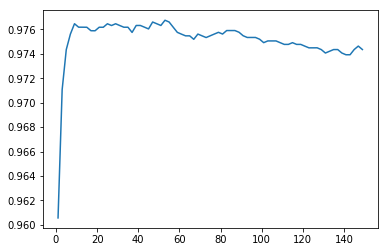

Best accuraccy: 0.9767477643639616
Best K: 53
Exactitud para k=5. Test accuracy score: 0.9743431701319026


In [340]:
plt.plot(k_values, means)
plt.show()

best_k=0
for i in range(0,len(means)):
    if(means[i]==max(means)):
        best_k=i
print("Best accuraccy:", max(means))
print("Best K:", k_values[best_k])
print("Exactitud para k=5. Test accuracy score:", means[2])

Como se puede observar en la imagen anterior, el k óptimo, para el caso de los no estudiantes, está en 53. 

Es importante recalcar que esta medida es mucho más confiable que la anterior debido a que el protocolo holdout está muy sujeto a incertidumbre debido a su aleatoriedad. 

### Comparación K sin protocolos y usando K-fold cross validation

#### Modelo de estudiantes

Podemos observar que para el caso de los estudiantes con k=5 es un caso de overfitting, esto se puede observar al mirar la gráfica del protocolo holdout. Allí podemos observar que obtenemos los siguientes datos: 

Exactitud para k=5. Training accuracy score: 0.9777830300165445 Test accuracy score: 0.9737681673165545

In [341]:
print("diferencia porcentual:",(0.9777830300165445-0.9737681673165545)*100,"%")

diferencia porcentual: 0.4014862699990074 %


La diferencia entre ambos es de un 4.0% que es un valor bastante alto. Además, podemos observar en las gráficas que son mostradas en el protocolo Cross validation que es donde el accuracy de prueba tiene los valores más pequeños.

Adicionalmente, al comparar el accuracy que tiene k=5 y óptimo que es k=61 se encuentran las siguientes diferencias:

In [342]:
accuracy_k_5=0.9588605858361143
accuracy_k_61=0.9666236559139787
incremento= (accuracy_k_61-accuracy_k_5)/accuracy_k_5
print("Incremento de precisión del K óptimo respecto a 5:",incremento*100,"%")

Incremento de precisión del K óptimo respecto a 5: 0.8096140557383601 %


#### Modelo de no estudiantes

Podemos observar que para el caso de los no estudiantes con k=5 es un caso de overfitting, esto se puede observar al mirar la gráfica del protocolo holdout. Allí podemos observar que obtenemos los siguientes datos: 

Exactitud para k=5. Training accuracy score: 0.9688561721404304 Test accuracy score: 0.9601018675721562

In [343]:
print("diferencia porcentual:",(0.9688561721404304-0.9601018675721562)*100,"%")

diferencia porcentual: 0.8754304568274196 %


La diferencia entre ambos es de un 8.8% que es un valor bastante alto. Además, podemos observar en las gráficas que son mostradas en el protocolo Cross validation que es donde el accuracy de prueba tiene los valores más pequeños.

Adicionalmente, al comparar el accuracy que tiene k=5 y el óptimo que es k=53 se encuentran las siguientes diferencias:

In [344]:
accuracy_k_5=0.9743431701319026
accuracy_k_53=0.9767477643639616
incremento= (accuracy_k_53-accuracy_k_5)/accuracy_k_5
print("Incremento de precisión del K óptimo respecto a 5:",incremento*100,"%")

Incremento de precisión del K óptimo respecto a 5: 0.24679130575046174 %
